In [18]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,classification_report,confusion_matrix,f1_score,accuracy_score

In [ ]:
# load the given dataset 

In [7]:
df=pd.read_csv(r"C:\Users\desai\Downloads\ML Project - Random Forest Hotel Cancellation Prediction Analysis 16955485770.txt")

In [9]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#apllying the basic statastic 

In [13]:
df.shape

(119390, 32)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
#analysing and removing the null values

In [15]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
for col in df.columns:
    print(col,df[col].unique())

hotel ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
lead_time [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

In [31]:
df["country"]=df["country"].replace(np.nan,"other")

In [41]:
# Fill nan in agent with mean of agent columns

In [45]:
df["agent"]=df["agent"].replace(np.nan,df["agent"].mean())

In [47]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [49]:
df["company"]=df["company"].replace(np.nan,df["company"].mean())

In [53]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [55]:
df=df.dropna()

In [59]:
#visulize and anylysing a data using seaborn and matplotlib

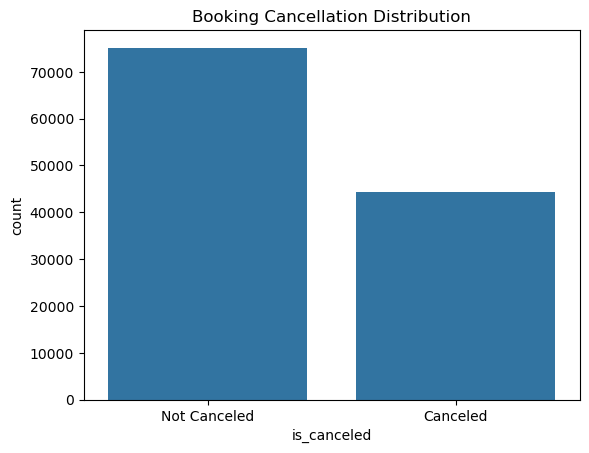

In [20]:
sns.countplot(x='is_canceled', data=df)
plt.title("Booking Cancellation Distribution")
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])

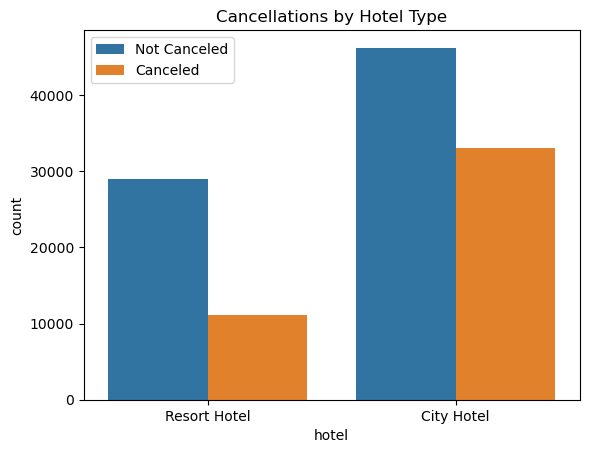

In [22]:
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title("Cancellations by Hotel Type")
plt.legend(labels=['Not Canceled', 'Canceled'])


Text(0.5, 1.0, 'Lead Time Distribution')

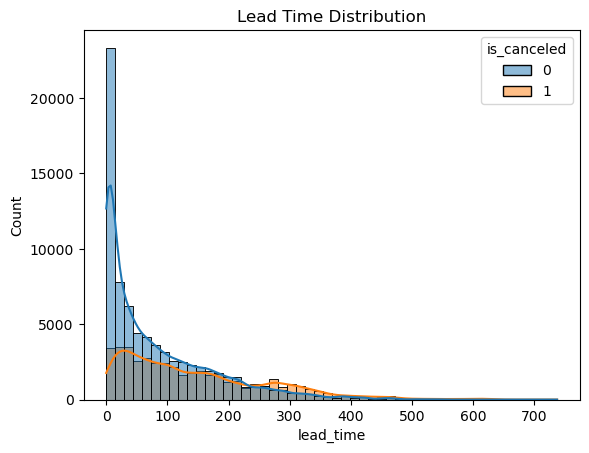

In [26]:
sns.histplot(data=df, x='lead_time', hue='is_canceled', kde=True, bins=50)
plt.title("Lead Time Distribution")

Text(0.5, 1.0, 'Monthly Cancellation Trends')

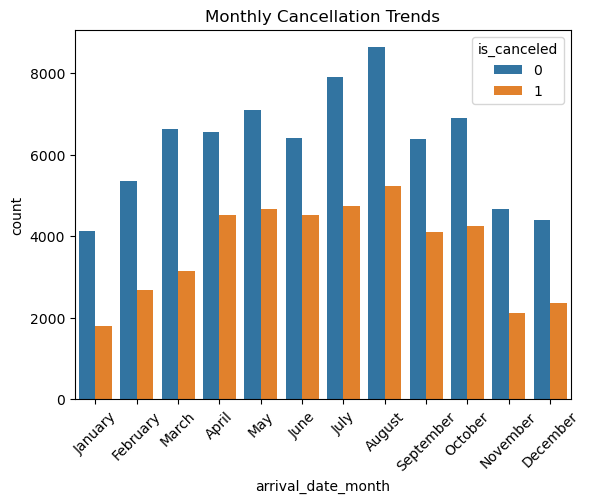

In [32]:
order = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.countplot(x='arrival_date_month', hue='is_canceled', data=df, order=order)
plt.xticks(rotation=45)
plt.title("Monthly Cancellation Trends")

Text(0.5, 1.0, 'count of children')

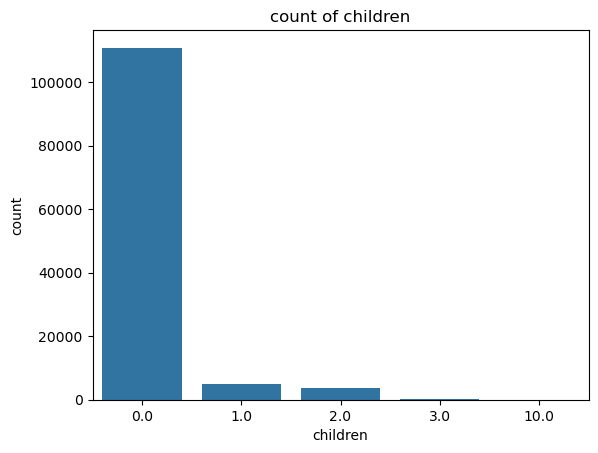

In [40]:
sns.barplot(df["children"].value_counts())
plt.title("count of children")

Text(0.5, 1.0, 'count of adults')

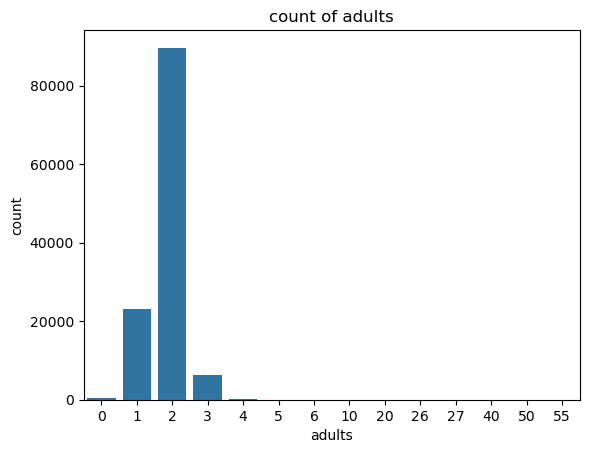

In [36]:
sns.barplot(df["adults"].value_counts())
plt.title("count of adults")

In [78]:
#Perform Label encoding on categorical columns

In [84]:
df = df.drop('reservation_status_date' , axis = 1 ) 

In [86]:
enc=LabelEncoder()

In [90]:
# Apply LabelEncoder to categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns  # select only categorical columns

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = enc.fit_transform(df[column])
print(df)    

        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0           1            0        342               2015                   5   
1           1            0        737               2015                   5   
2           1            0          7               2015                   5   
3           1            0         13               2015                   5   
4           1            0         14               2015                   5   
...       ...          ...        ...                ...                 ...   
119385      0            0         23               2017                   1   
119386      0            0        102               2017                   1   
119387      0            0         34               2017                   1   
119388      0            0        109               2017                   1   
119389      0            0        205               2017                   1   

        arrival_date_week_number  arriv

In [92]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,86.693382,189.266735,0,2,0.00,0,0,1
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,86.693382,189.266735,0,2,0.00,0,0,1
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,86.693382,189.266735,0,2,75.00,0,0,1
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.000000,189.266735,0,2,75.00,0,0,1
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.000000,189.266735,0,2,98.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,0,394.000000,189.266735,0,2,96.14,0,0,1
119386,0,0,102,2017,1,35,31,2,5,3,...,0,0,9.000000,189.266735,0,2,225.43,0,2,1
119387,0,0,34,2017,1,35,31,2,5,2,...,0,0,9.000000,189.266735,0,2,157.71,0,4,1
119388,0,0,109,2017,1,35,31,2,5,2,...,0,0,89.000000,189.266735,0,2,104.40,0,0,1


In [94]:
#Split into training & testing

In [100]:
x=df.drop("is_canceled",axis=1)
y=df.is_canceled

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
#Apply Random forest classifier on data

In [122]:
model=RandomForestClassifier(max_depth=12,
            min_samples_leaf=1,
             min_samples_split= 2,
             n_estimators=100,
             random_state=43)

In [124]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, random_state=43)

In [125]:
model.score(x_train,y_train)

1.0

In [126]:
model.score(x_test,y_test)

0.9999581204455985

In [132]:
y_pred=model.predict(x_test)

In [130]:
# Create function which show Precision score, recall score, accuracy, classification report and confusion matrix

In [134]:
print("accuresy_score:",accuracy_score(y_test,y_pred))
print("recall_score:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("precision_score:",precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


accuresy_score: 0.9999581204455985
recall_score: 0.9998865698729582
f1_score: 0.9999432817196983
precision_score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15062
           1       1.00      1.00      1.00      8816

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878

[[15062     0]
 [    1  8815]]


In [156]:
cm=confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'confusion_metrix')

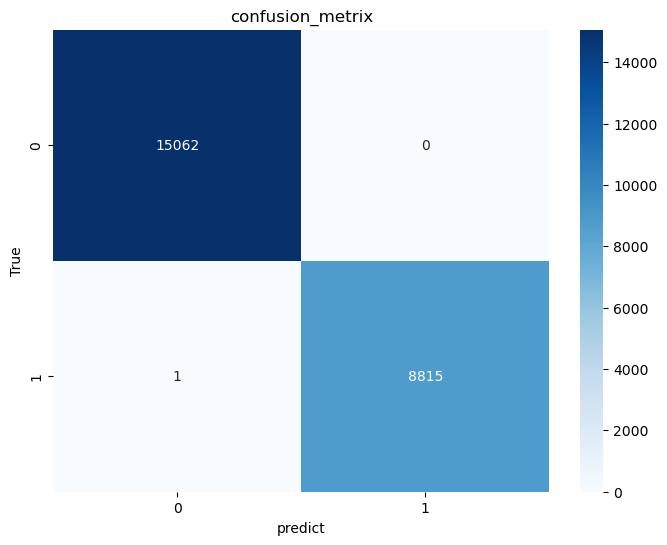

In [168]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("predict")
plt.ylabel("True")
plt.title("confusion_metrix")
